In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import sys
import pickle
rcParams.update({'figure.autolayout': True})
import pandas as pd

In [2]:
df_ent = pd.read_csv('ent_tweets_world.csv', delimiter='\t', na_values=".",error_bad_lines=False)#,warn_bad_lines=False)
print(df_ent.shape)
print(df_ent.columns)

rows_ent=list(df_ent[['user_id','tweet_created_at']].itertuples(index=False, name=None)) #rows_ent0
del df_ent
print("Number of tweets in ent:",len(rows_ent))  #rows_ent0
print('Memory size of ent:',sys.getsizeof(rows_ent))

(47604376, 4)
Index(['user_id', 'tweet', 'tweet_created_at', 'location_profile'], dtype='object')
Number of tweets in ent: 47604376
Memory size of ent: 402267520


In [3]:
df_public = pd.read_csv('public_tweets_world.csv', delimiter='\t', na_values=".",error_bad_lines=False)#,warn_bad_lines=False)

print(df_public.shape)
print(df_public.columns)

rows_public00=list(df_public[['user_id','tweet_created_at']].itertuples(index=False, name=None))

del df_public
print(len(rows_public00))
print('memory size of public:', sys.getsizeof(rows_public00))

(72182875, 4)
Index(['user_id', 'tweet', 'tweet_created_at', 'location_profile'], dtype='object')
72182875
memory size of public: 644355008


In [4]:
rows_public00[0][1]

'2020-07-24 09:08:11'

In [5]:
rows_public=[]
for i in rows_public00:
    if ('2021' not in i[1] ) and ('2020-12' not in i[1]) and ('2020-11' not in i[1]) and ('2020-10' not in i[1]):
        rows_public.append(i)
        
print(len(rows_public))
del rows_public00        

53069041


In [6]:
df_mng = pd.read_csv('mng_tweets_world.csv', delimiter='\t', na_values=".",error_bad_lines=False,warn_bad_lines=False)
print(df_mng.shape)
print(df_mng.columns)

rows_mng=list(df_mng[['user_id','tweet_created_at']].itertuples(index=False, name=None)) #rows_mng0

del df_mng
print(len(rows_mng)) #rows_mng0
print('size of mng:', sys.getsizeof(rows_mng)) #rows_mng0

(46502302, 4)
Index(['user_id', 'tweet', 'tweet_created_at', 'location_profile'], dtype='object')
46502302
size of mng: 402267520


In [7]:
with open("ent_filtering.txt", "rb") as fp:   
    ent_filter = pickle.load(fp)

In [8]:
with open("mng_filtering.txt", "rb") as fp:   
    mng_filter = pickle.load(fp)

In [9]:
with open("public_filtering.txt", "rb") as fp:   
    public_filter = pickle.load(fp)

In [10]:
len(ent_filter),len(mng_filter),len(public_filter)

(2060, 5319, 3426)

In [11]:
d_ent = dict()
for row in rows_ent:
    if str(row[0]) not in ent_filter:
        info=row[1].split('-')
        if str(info[0])+'-'+str(info[1]) not in d_ent:
            d_ent[ str(info[0])+'-'+str(info[1]) ] = 1 
        else:
            d_ent[ str(info[0])+'-'+str(info[1])  ] +=  1    

In [12]:
d_new_ent=dict(sorted(d_ent.items()))

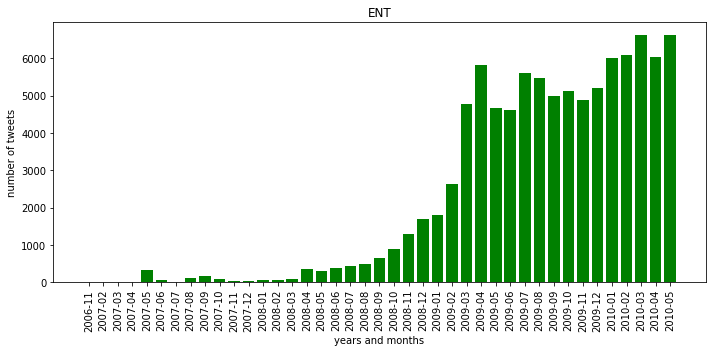

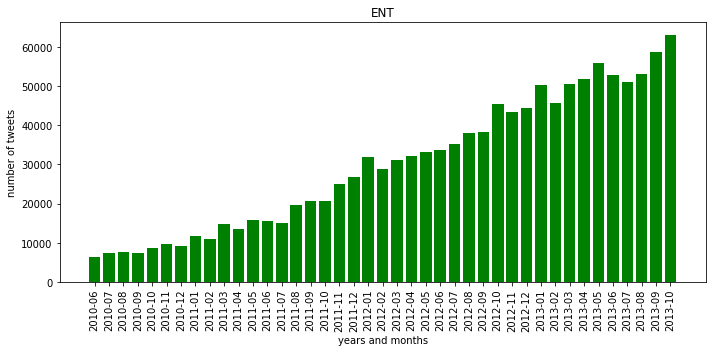

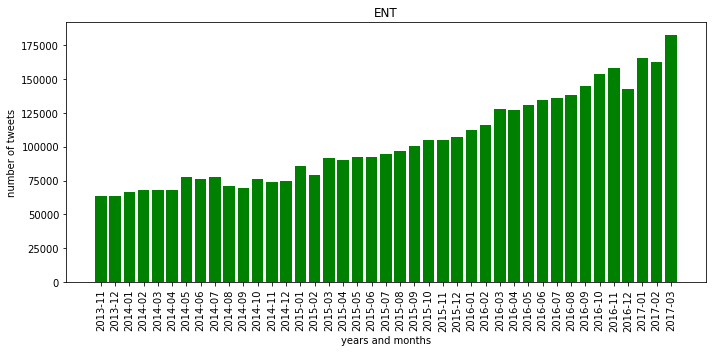

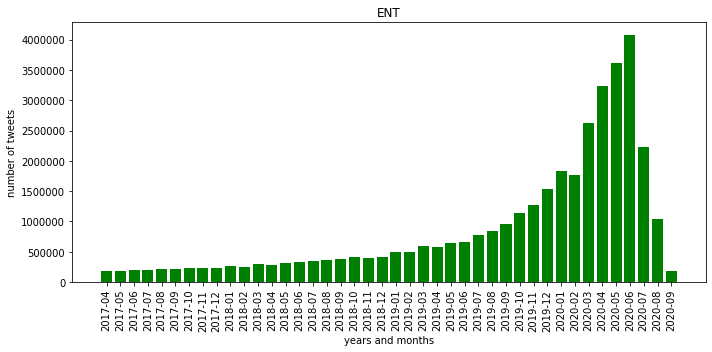

In [13]:
d_new1_ent = dict(list(d_new_ent.items())[0:len(d_new_ent)//4]) 
d_new2_ent = dict(list(d_new_ent.items())[len(d_new_ent)//4:len(d_new_ent)//2])
d_new3_ent = dict(list(d_new_ent.items())[len(d_new_ent)//2:3*len(d_new_ent)//4])
d_new4_ent = dict(list(d_new_ent.items())[3*len(d_new_ent)//4:])

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.rcParams["figure.figsize"] = (10,5)


plt.bar(d_new1_ent.keys(), d_new1_ent.values(),color='g')
plt.xlabel('years and months')
plt.ylabel('number of tweets')
plt.title('ENT')
plt.xticks(rotation=90)
#plt.savefig("histogram1.jpg")
#plt.savefig('histogram1.pdf')
plt.show()

plt.bar(d_new2_ent.keys(), d_new2_ent.values(),color='g')
plt.xlabel('years and months')
plt.ylabel('number of tweets')
plt.title('ENT')
plt.xticks(rotation=90)
#plt.savefig("histogram2.jpg")
#plt.savefig('histogram2.pdf')
plt.show()

plt.bar(d_new3_ent.keys(), d_new3_ent.values(),color='g')
plt.xlabel('years and months')
plt.ylabel('number of tweets')
plt.title('ENT')
plt.xticks(rotation=90)
#plt.savefig("histogram3.jpg")
#plt.savefig('histogram3.pdf')
plt.show()

plt.bar(d_new4_ent.keys(), d_new4_ent.values(),color='g')
plt.xlabel('years and months')
plt.ylabel('number of tweets')
plt.title('ENT')
plt.xticks(rotation=90)
#plt.savefig("histogram4.jpg")
#plt.savefig('histogram4.pdf')
plt.show()

In [14]:
d2_ent = dict()
for row in rows_ent:
    #print(row)
    if str(row[0]) not in ent_filter:
        info=row[1].split('-')
        if info[0] not in d2_ent:
            d2_ent[ info[0] ] = 1 
        else:
            d2_ent[ info[0] ] +=  1    

# Number of tweets based year for ent 

In [15]:
d2_ent=dict(sorted(d2_ent.items()))
print('number of tweets based on years')
d2_ent

number of tweets based on years


{'2006': 1,
 '2007': 843,
 '2008': 6660,
 '2009': 55527,
 '2010': 88218,
 '2011': 210739,
 '2012': 435385,
 '2013': 659735,
 '2014': 867014,
 '2015': 1140708,
 '2016': 1621810,
 '2017': 2401052,
 '2018': 4024615,
 '2019': 9986648,
 '2020': 20615838}

In [16]:
aa=list(d2_ent.values())
cumulative = np.cumsum(aa)/len(rows_ent)
cumulative

array([2.10064722e-08, 1.77294625e-05, 1.57632567e-04, 1.32405895e-03,
       3.17720791e-03, 7.60409085e-03, 1.67499937e-02, 3.06086987e-02,
       4.88216041e-02, 7.27838550e-02, 1.06852362e-01, 1.57289994e-01,
       2.41832957e-01, 4.51617200e-01, 8.84683227e-01])

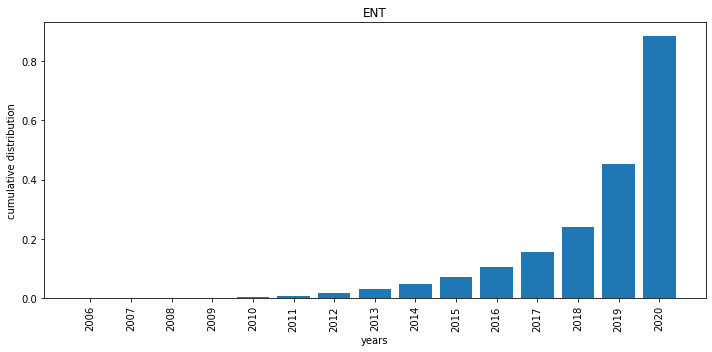

In [17]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.rcParams["figure.figsize"] = (10,5)

plt.bar(list(d2_ent.keys()), cumulative)
plt.xlabel('years')
plt.ylabel('cumulative distribution')
plt.title('ENT')
plt.xticks(rotation=90)
#plt.savefig("cumulative.jpg")
#plt.savefig('cumulative.pdf')

plt.show()

In [18]:
d_mng = dict()
for row in rows_mng:
    if str(row[0]) not in mng_filter:
        info=row[1].split('-')
        if str(info[0])+'-'+str(info[1]) not in d_mng:
            d_mng[ str(info[0])+'-'+str(info[1]) ] = 1 
        else:
            d_mng[ str(info[0])+'-'+str(info[1])  ] +=  1    

In [19]:
d_new_mng=dict(sorted(d_mng.items()))

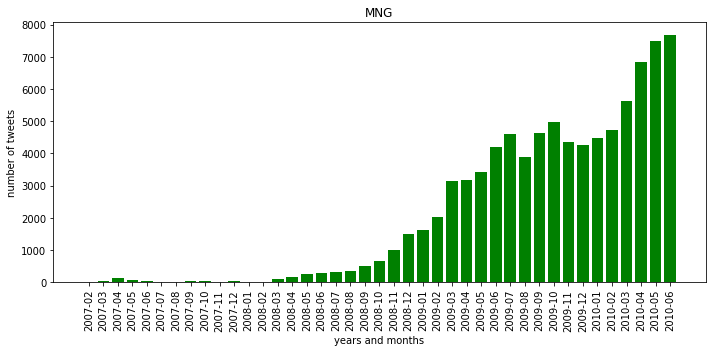

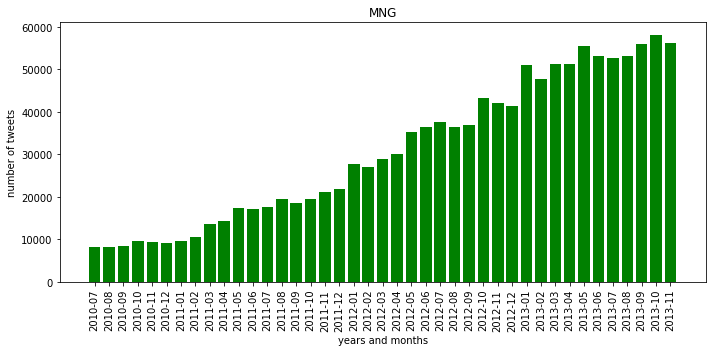

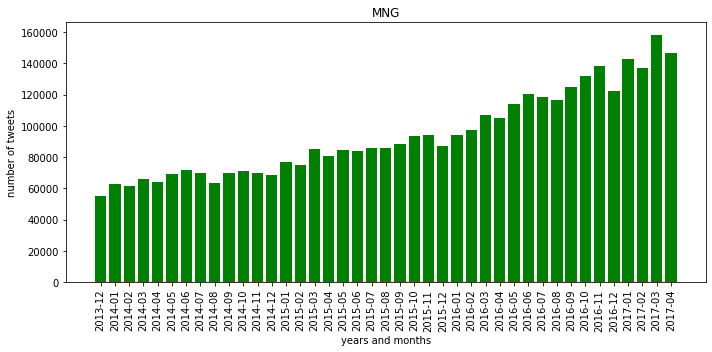

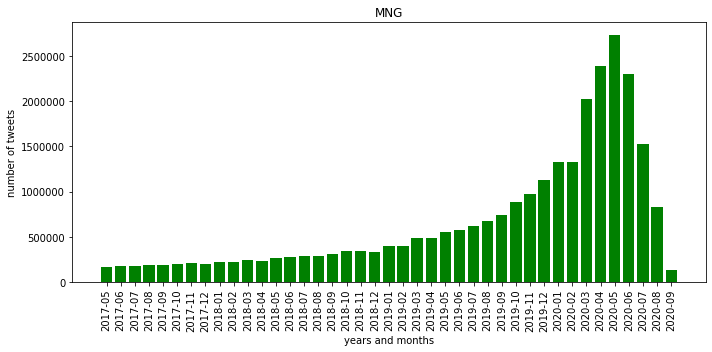

In [20]:
d_new1_mng = dict(list(d_new_mng.items())[0:len(d_new_mng)//4]) 
d_new2_mng = dict(list(d_new_mng.items())[len(d_new_mng)//4:len(d_new_mng)//2])
d_new3_mng = dict(list(d_new_mng.items())[len(d_new_mng)//2:3*len(d_new_mng)//4])
d_new4_mng = dict(list(d_new_mng.items())[3*len(d_new_mng)//4:])

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.rcParams["figure.figsize"] = (10,5)

plt.bar(d_new1_mng.keys(), d_new1_mng.values(),color='g')
plt.xlabel('years and months')
plt.ylabel('number of tweets')
plt.title('MNG')
plt.xticks(rotation=90)
#plt.savefig("histogram1.jpg")
#plt.savefig('histogram1.pdf')
plt.show()

plt.bar(d_new2_mng.keys(), d_new2_mng.values(),color='g')
plt.xlabel('years and months')
plt.ylabel('number of tweets')
plt.title('MNG')
plt.xticks(rotation=90)
#plt.savefig("histogram2.jpg")
#plt.savefig('histogram2.pdf')
plt.show()

plt.bar(d_new3_mng.keys(), d_new3_mng.values(),color='g')
plt.xlabel('years and months')
plt.ylabel('number of tweets')
plt.title('MNG')
plt.xticks(rotation=90)
#plt.savefig("histogram3.jpg")
#plt.savefig('histogram3.pdf')
plt.show()

plt.bar(d_new4_mng.keys(), d_new4_mng.values(),color='g')
plt.xlabel('years and months')
plt.ylabel('number of tweets')
plt.title('MNG')
plt.xticks(rotation=90)
#plt.savefig("histogram4.jpg")
#plt.savefig('histogram4.pdf')
plt.show()

In [21]:
d2_mng = dict()
for row in rows_mng:
    if str(row[0]) not in mng_filter:
        info=row[1].split('-')
        if info[0] not in d2_mng:
            d2_mng[ info[0] ] = 1 
        else:
            d2_mng[ info[0] ] +=  1    

# Number of tweets based on year for mng

In [22]:
d2_mng=dict(sorted(d2_mng.items()))
print('number of tweets based years')
d2_mng

number of tweets based years


{'2007': 399,
 '2008': 5198,
 '2009': 44215,
 '2010': 89835,
 '2011': 201151,
 '2012': 423107,
 '2013': 640859,
 '2014': 806878,
 '2015': 1021737,
 '2016': 1389391,
 '2017': 2097364,
 '2018': 3375928,
 '2019': 7925195,
 '2020': 14595754}

In [23]:
bb=list(d2_mng.values())
cumulative_m = np.cumsum(bb)/len(rows_mng)
cumulative_m

array([8.58022039e-06, 1.20359633e-04, 1.07117278e-03, 3.00301263e-03,
       7.32862644e-03, 1.64272513e-02, 3.02084830e-02, 4.75598391e-02,
       6.95315901e-02, 9.94094873e-02, 1.44511857e-01, 2.17108865e-01,
       3.87534729e-01, 7.01406373e-01])

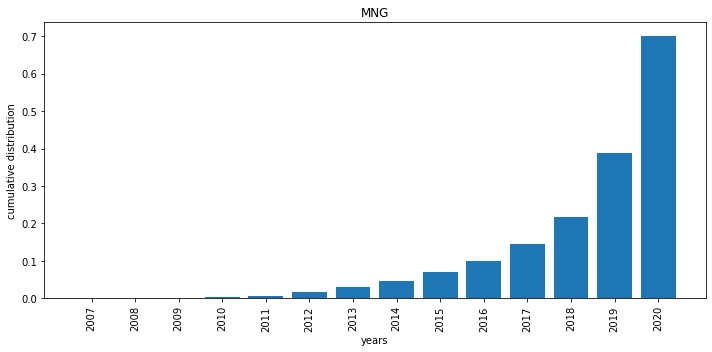

In [24]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.rcParams["figure.figsize"] = (10,5)

plt.bar(list(d2_mng.keys()), cumulative_m)
plt.xlabel('years')
plt.ylabel('cumulative distribution')
plt.title('MNG')
plt.xticks(rotation=90)
#plt.savefig("cumulative.jpg")
#plt.savefig('cumulative.pdf')

plt.show()

# Number of tweets based year for public

In [25]:
d_public = dict()
for row in rows_public:
    #if str(row[0]) not in public_filter:
        info=row[1].split('-')
        if str(info[0])+'-'+str(info[1]) not in d_public:
            d_public[ str(info[0])+'-'+str(info[1]) ] = 1 
        else:
            d_public[ str(info[0])+'-'+str(info[1])  ] +=  1    

In [26]:
d_new_public=dict(sorted(d_public.items()))

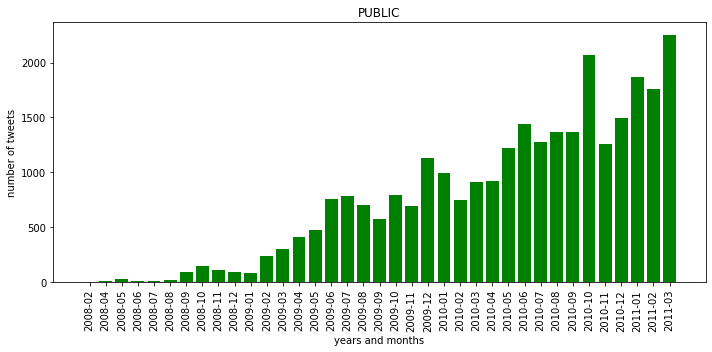

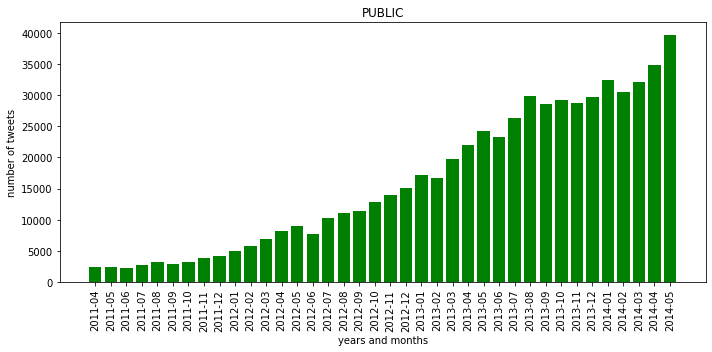

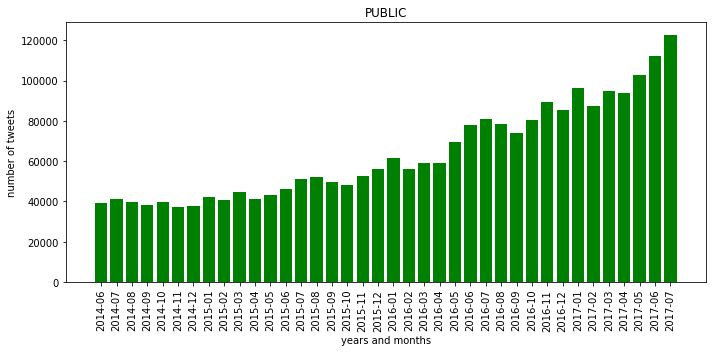

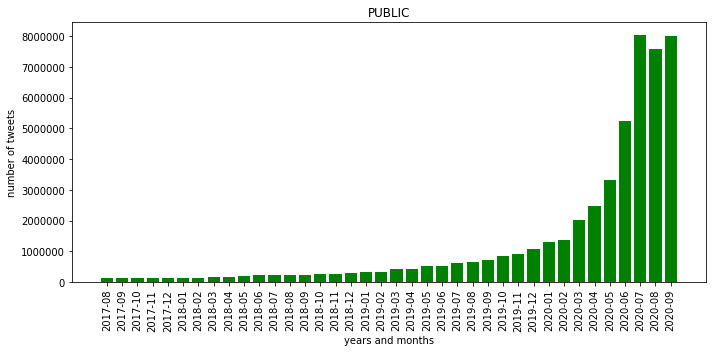

In [27]:
d_new1_public = dict(list(d_new_public.items())[0:len(d_new_public)//4]) 
d_new2_public = dict(list(d_new_public.items())[len(d_new_public)//4:len(d_new_public)//2])
d_new3_public = dict(list(d_new_public.items())[len(d_new_public)//2:3*len(d_new_public)//4])
d_new4_public = dict(list(d_new_public.items())[3*len(d_new_public)//4:])

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.rcParams["figure.figsize"] = (10,5)

plt.bar(d_new1_public.keys(), d_new1_public.values(),color='g')
plt.xlabel('years and months')
plt.ylabel('number of tweets')
plt.title('PUBLIC')
plt.xticks(rotation=90)
#plt.savefig("histogram1.jpg")
#plt.savefig('histogram1.pdf')
plt.show()

plt.bar(d_new2_public.keys(), d_new2_public.values(),color='g')
plt.xlabel('years and months')
plt.ylabel('number of tweets')
plt.title('PUBLIC')
plt.xticks(rotation=90)
#plt.savefig("histogram2.jpg")
#plt.savefig('histogram2.pdf')
plt.show()

plt.bar(d_new3_public.keys(), d_new3_public.values(),color='g')
plt.xlabel('years and months')
plt.ylabel('number of tweets')
plt.title('PUBLIC')
plt.xticks(rotation=90)
#plt.savefig("histogram3.jpg")
#plt.savefig('histogram3.pdf')
plt.show()

plt.bar(d_new4_public.keys(), d_new4_public.values(),color='g')
plt.xlabel('years and months')
plt.ylabel('number of tweets')
plt.title('PUBLIC')
plt.xticks(rotation=90)
#plt.savefig("histogram4.jpg")
#plt.savefig('histogram4.pdf')
plt.show()

In [28]:
d2_public = dict()
for row in rows_public:
    #if str(row[0]) not in public_filter:
        info=row[1].split('-')
        if info[0] not in d2_public:
            d2_public[ info[0] ] = 1 
        else:
            d2_public[ info[0] ] +=  1    

In [29]:
d2_public=dict(sorted(d2_public.items()))
print('number of tweets based years')
d2_public

number of tweets based years


{'2008': 521,
 '2009': 6947,
 '2010': 15066,
 '2011': 32918,
 '2012': 117337,
 '2013': 295716,
 '2014': 443082,
 '2015': 567575,
 '2016': 872511,
 '2017': 1359813,
 '2018': 2600485,
 '2019': 7402805,
 '2020': 39354265}

In [30]:
bb=list(d2_public.values())
cumulative_p = np.cumsum(bb)/len(rows_public)
cumulative_p

array([9.81739994e-06, 1.40722347e-04, 4.24616680e-04, 1.04490300e-03,
       3.25592844e-03, 8.82821681e-03, 1.71773784e-02, 2.78724087e-02,
       4.43134633e-02, 6.99369337e-02, 1.18938856e-01, 2.58432708e-01,
       1.00000000e+00])

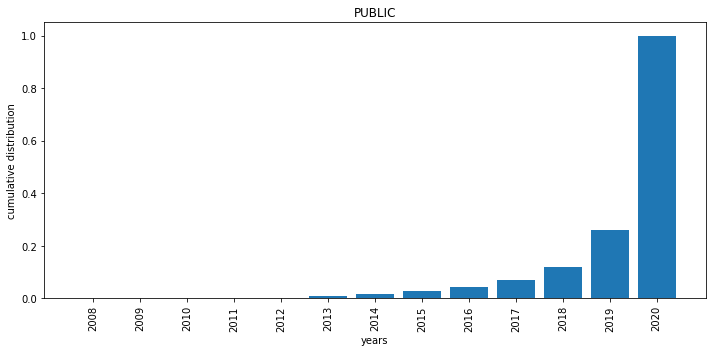

In [31]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.rcParams["figure.figsize"] = (10,5)

plt.bar(list(d2_public.keys()), cumulative_p)
plt.xlabel('years')
plt.ylabel('cumulative distribution')
plt.title('PUBLIC')
plt.xticks(rotation=90)
#plt.savefig("cumulative.jpg")
#plt.savefig('cumulative.pdf')

plt.show()